# Pymaceuticals Inc.
---

### Analysis

After going over the data supplied, it would appear that mice being treated with Capomulin have a very similar reaction as mice being treated with Ramicane.
Both treatments have a significant difference in result than the other regiments and shows that Pharmaceuticals Inc should proceed with using Capomulin.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, on= "Mouse ID")

# Display the data table for preview
combined_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(combined_df["Mouse ID"].unique())

249

In [20]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_counts = combined_df.groupby(['Mouse ID', 'Timepoint']).size()
duplicate_mice = duplicate_counts[duplicate_counts > 1]

duplicate_mice_ids = duplicate_mice.index.get_level_values('Mouse ID').unique()
duplicate_mice_ids.values

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = combined_df[combined_df['Mouse ID'].isin(duplicate_mice_ids)]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df= combined_df[combined_df['Mouse ID'] != 'g989']
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
grouped_df = combined_df.groupby('Drug Regimen')
mean = grouped_df['Tumor Volume (mm3)'].mean()
median = grouped_df['Tumor Volume (mm3)'].median()
variance = grouped_df['Tumor Volume (mm3)'].var()
std_deviation = grouped_df['Tumor Volume (mm3)'].std()
sem = grouped_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': variance,
    'Tumor Volume Std. Dev.': std_deviation,
    'Tumor Volume Std. Err.': sem
})
summary_stats.head(10)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statsagg = grouped_df['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# summary_statsagg.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']
summary_statsagg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of observed mice timepoints')

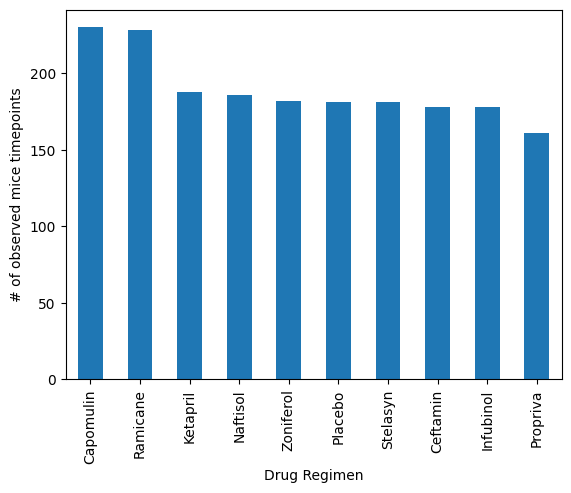

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# creating variables to use for following two graphs
total_count = combined_df.groupby('Drug Regimen').count()
total_count_mice = total_count['Mouse ID'].sort_values(ascending=False)
drug_regimen_names = total_count_mice.index

# assembling data into dataframe and pandas bar plot
pandas_count_df = pd.DataFrame({'Drug Regimen' : drug_regimen_names,'Mouse Count': total_count_mice} )
pandas_count_plot = pandas_count_df.plot(kind='bar', x='Drug Regimen', y='Mouse Count', legend=None)
pandas_count_plot.set_ylabel('# of observed mice timepoints')

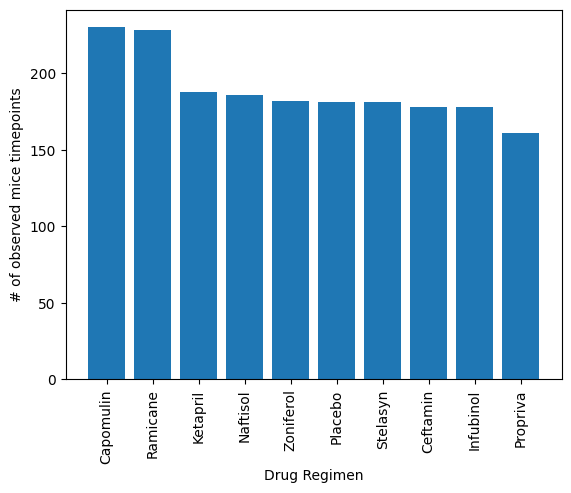

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_regimen_names, total_count_mice, align='center')
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel("# of observed mice timepoints")
plt.show()

Text(0, 0.5, 'Sex')

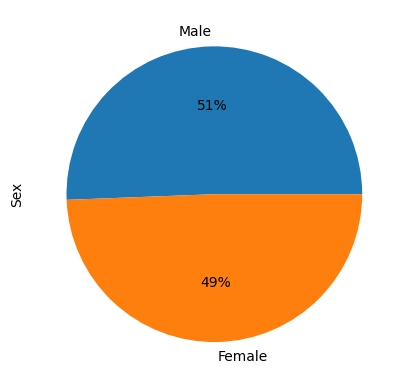

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# creating variables to use for following two graphs
gender_count = combined_df.groupby('Sex').count()
gender_count_mice = gender_count['Mouse ID'].sort_index(ascending=False)
gender_count_yval = gender_count_mice.index

# assembling data into dataframe and pandas pie plot
pandas_sex_df = pd.DataFrame({'Sex' : gender_count_yval,'Mouse Count': gender_count_mice})
pandas_sex_pieplot = pandas_sex_df.plot(kind='pie', y='Mouse Count', labels=pandas_sex_df['Sex'],autopct='%1.0f%%', legend=None)
pandas_sex_pieplot.set_ylabel("Sex")

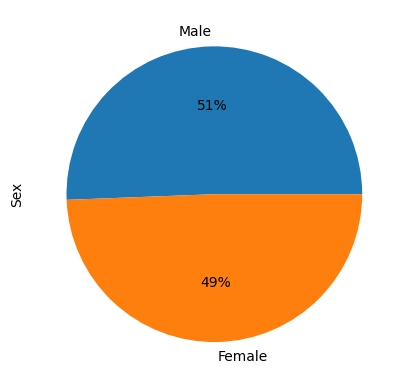

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_count_mice, labels=gender_count_yval, autopct='%1.0f%%')
plt.xticks(rotation=90)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
sorted_final = combined_df.set_index(combined_df['Drug Regimen']).sort_index()
sorted_4_Drugs = sorted_final.loc[['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], ['Mouse ID', 'Timepoint', "Tumor Volume (mm3)", 'Drug Regimen']]

last_timepoints = sorted_4_Drugs.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoints, final_sorted, on=['Mouse ID', 'Timepoint'], how='left')
sorted_df = merged_df.sort_values(['Drug Regimen'])

In [22]:
# Put treatments into a list for for loop (and later for plot labels)
tumor_list = sorted_df['Tumor Volume (mm3)'].tolist()
treatments = sorted_df['Drug Regimen'].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = sorted_df.loc[merged_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    # add subset
    tumor_vol_list.append(tumor_volumes)
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    
    upper_quartile = quartiles[0.75]
    lower_quartile = quartiles[0.25]
    iqr = upper_quartile - lower_quartile

    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)

    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f'{treatment}s outliers: {outliers}')  


Capomulins outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamins outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinols outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ramicanes outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


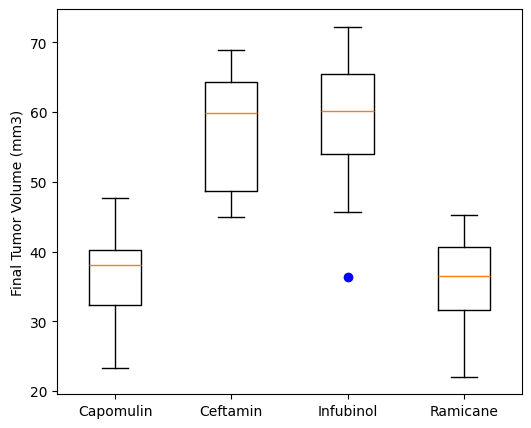

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(6, 5))
plt.boxplot(tumor_vol_list, labels=treatments, sym='blue')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

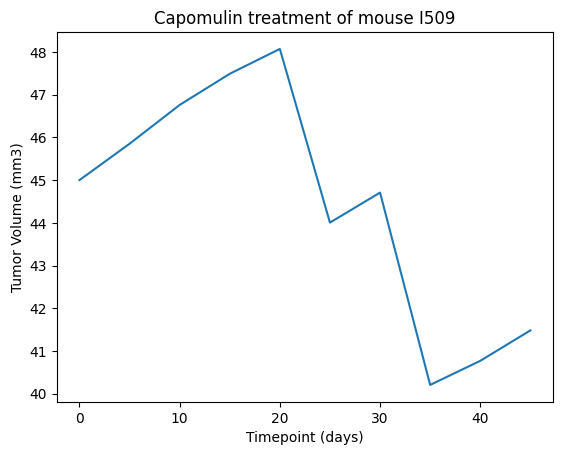

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# assigning variables
capomulin_data = combined_df[combined_df['Drug Regimen'] == 'Capomulin']
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == "l509"]
I509_tum_vol = mouse_data['Tumor Volume (mm3)']
I509_tim_poi = mouse_data['Timepoint']
# Generating a line graph with variables above
plt.plot(I509_tim_poi, I509_tum_vol)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse I509")
plt.show()

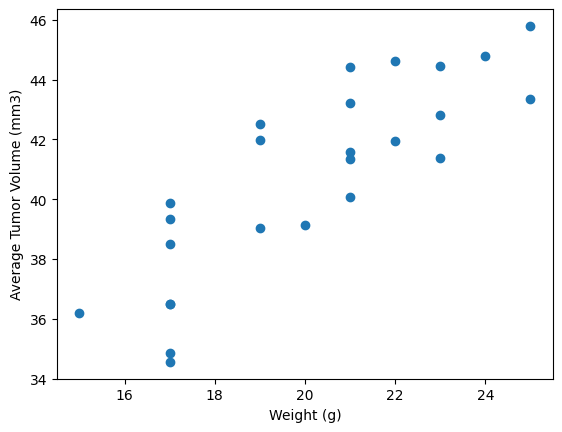

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# assigning variables
capomulin_mice = capomulin_data.groupby('Mouse ID')
capomulin_avg_tum = capomulin_mice['Tumor Volume (mm3)'].mean()
capomulin_avg_wei = capomulin_mice['Weight (g)'].mean()
# Generating scatterplot with variables above
plt.scatter(capomulin_avg_wei, capomulin_avg_tum)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


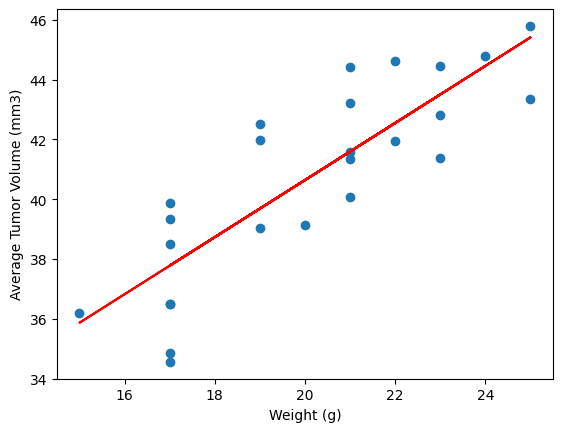

In [23]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = capomulin_avg_wei.corr(capomulin_avg_tum)
correlation_coefficient = '{:.2f}'.format(correlation_coefficient)
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient}")

slope, intercept, r_value, p_value, std_err = linregress(capomulin_avg_wei, capomulin_avg_tum)
# recreating above scatterplot and adding a correlation line ontop
plt.scatter(capomulin_avg_wei, capomulin_avg_tum)
plt.plot(capomulin_avg_wei, slope * capomulin_avg_wei + intercept, color='red', label='Regression Line')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
